In [2]:
# Step 1: Import libraries (These are like your tools for the job)
import pandas as pd          # To read the Excel file and work with data tables
import nltk                  # Natural Language Toolkit - helps understand and clean words
from nltk.corpus import stopwords  # List of common words like 'and', 'the', etc.
from collections import Counter    # Helps count how often each word appears
import string                # Helps remove punctuation like . , ! ?
import matplotlib.pyplot as plt  # To draw a graph

# Step 2: Download stopwords if it's your first time
nltk.download('stopwords')

# Step 3: Load the Excel file
file_path = r"C:\Users\user\Desktop\data analysis project\datasets\kise recommends (1).xlsx"
df = pd.read_excel(file_path)

# Step 4: Look at the column names to find the one with recommendations
print("Column names in the Excel file:", df.columns)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Column names in the Excel file: Index(['Recommendations'], dtype='object')


In [5]:
# Let's assume the column is called "Recommendations"
# If it's called something else like "Rec" or "Suggestion", replace it in the line below:
text_data = df["Recommendations"].dropna()  # Remove any empty cells

# Step 5: Combine all recommendations into one big paragraph
all_text = " ".join(text_data.astype(str))  # Turn all into strings and join them

# Step 6: Clean the text
# - Make everything lowercase (so 'Support' and 'support' are the same)
# - Remove punctuation
# - Remove stopwords (like "and", "the", "of")
all_text = all_text.lower()  # Lowercase
all_text = all_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

# Break text into individual words
words = all_text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Step 7: Count the most common words
word_counts = Counter(filtered_words)
most_common = word_counts.most_common(10)  # Top 10 most frequent words

print(most_common)

[('children', 16), ('parents', 11), ('therapy', 6), ('schools', 5), ('support', 5), ('disability', 5), ('services', 4), ('people', 4), ('training', 4), ('please', 4)]


In [6]:
# Step 8: Show results
print("\nTop 10 Most Frequent Words in the Recommendations:")
for word, count in most_common:
    print(f"{word}: {count} times")


Top 10 Most Frequent Words in the Recommendations:
children: 16 times
parents: 11 times
therapy: 6 times
schools: 5 times
support: 5 times
disability: 5 times
services: 4 times
people: 4 times
training: 4 times
please: 4 times


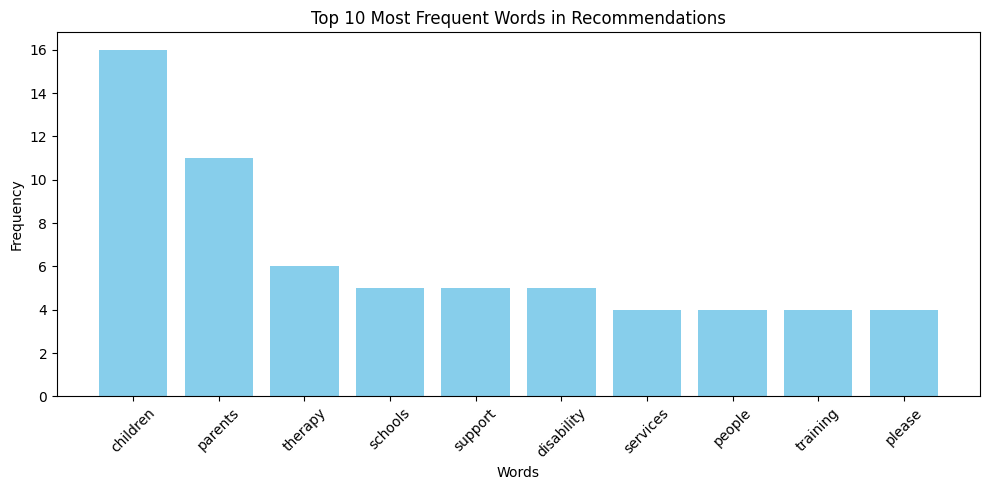

In [7]:
# Step 9 (Optional): Draw a bar graph of the top 10 words
words, counts = zip(*most_common)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Most Frequent Words in Recommendations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Step 7: Group related words into themes
themes = {
    "Parental & Family Support": ["parents", "parental", "caregiver", "caregivers", "support", "counselling"],
    "Education & Schools": ["school", "schools", "education", "teaching", "educational", "training", "train", "sessions", "kise"],
    "Therapy & Health Services": ["therapy", "counselling", "speech", "care", "services", "aid", "assist", "help"],
    "Assistive Technology": ["assistive", "devices", "facilities"],
    "Inclusion & Empowerment": ["empowerment", "independent", "community", "people", "autistic", "intellectually", "gifted", "adults"],
    "Accessibility & Equity": ["free", "time", "place", "bring", "counties", "see", "future", "offer", "make", "please", "best", "give"]
}

# Step 11: Group the frequent words into themes
theme_summary = {theme: [] for theme in themes}

for word, count in most_common:
    for theme, keywords in themes.items():
        if word in keywords:
            theme_summary[theme].append((word, count))

# Step 12: Print grouped recommendations
print("\n📌 Grouped Recommendations by Theme:")
for theme, items in theme_summary.items():
    if items:
        print(f"\nTheme: {theme}")
        for word, count in items:
            print(f"  - {word} ({count} times)")



📌 Grouped Recommendations by Theme:

Theme: Parental & Family Support
  - parents (11 times)
  - support (5 times)

Theme: Education & Schools
  - schools (5 times)
  - training (4 times)

Theme: Therapy & Health Services
  - therapy (6 times)
  - services (4 times)

Theme: Inclusion & Empowerment
  - people (4 times)

Theme: Accessibility & Equity
  - please (4 times)


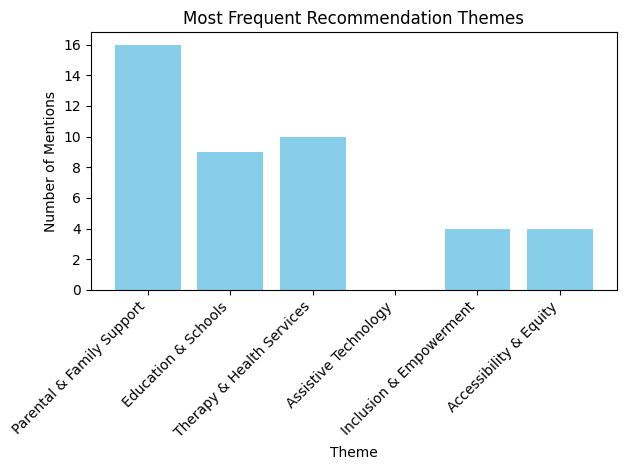

In [16]:
theme_counts = {theme: sum(count for _, count in words) for theme, words in theme_summary.items()}
plt.bar(theme_counts.keys(), theme_counts.values(), color='skyblue')
plt.title("Most Frequent Recommendation Themes")
plt.xlabel("Theme")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()